## Notebook to work on Complex network >> Detection of Core-Periphery structure

### To do

#### Found community structure inside a given complex network
#### Identify global and local components for each community structure
#### Search core-periphery structure inside each identified component

- Use Zackary Karate club complex network
- Use complex network co-authorship scientists

#### Description of Zachary Karate club  network

Zachary Karate club is a social network of friendships between **34 members of a karate club at a US university in 1970s**.

In [438]:
# importation of modules
import cpnet
import math
from surprisememore import UndirectedGraph
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
from networkx.algorithms import community

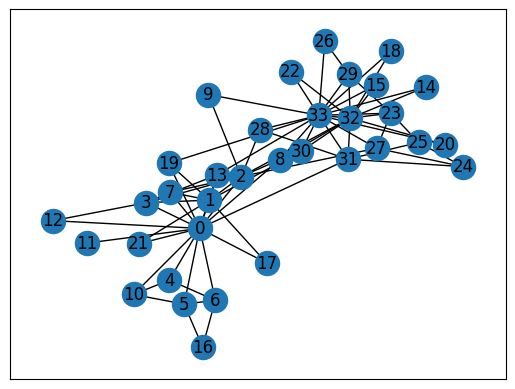

In [327]:
# Graph definition
kc_graph = nx.karate_club_graph()
nx.draw_networkx(kc_graph, node_size=300)

In [351]:
# Communities detection with Louvain algorithm

partition = community_louvain.best_partition(kc_graph, resolution=1.0, randomize=True)

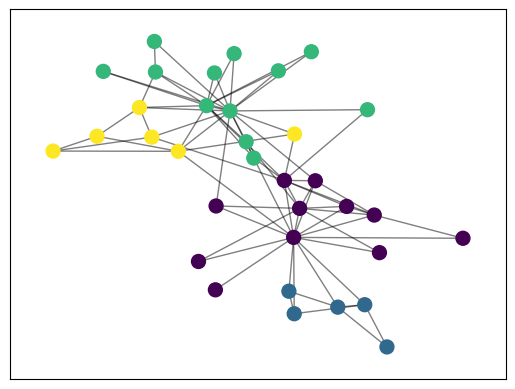

In [352]:
pos = nx.spring_layout(kc_graph)
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(kc_graph, pos, partition.keys(), node_size=100, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(kc_graph, pos, alpha=0.5)
plt.show()

## Component Structure of complex network
### Definition: 
A component structure define a network with two sets of subnetworks:
- vthe dense parts of the network form the **local components**
- Nodes and links shared by any two local components form the **global components**

### Component Structure detection algorithm
The algorithm to uncover the component structure of a network proceeds as follows:
1. Uncover the dense part of the network: Use a community detection algorithm to uncover the community
2. Extract the **local components**: Remove the inter-community links from community structure to form the local components
3. Extract the **global component**: Remove the intra-community links from community structure and the subsequent **isolated nodes**

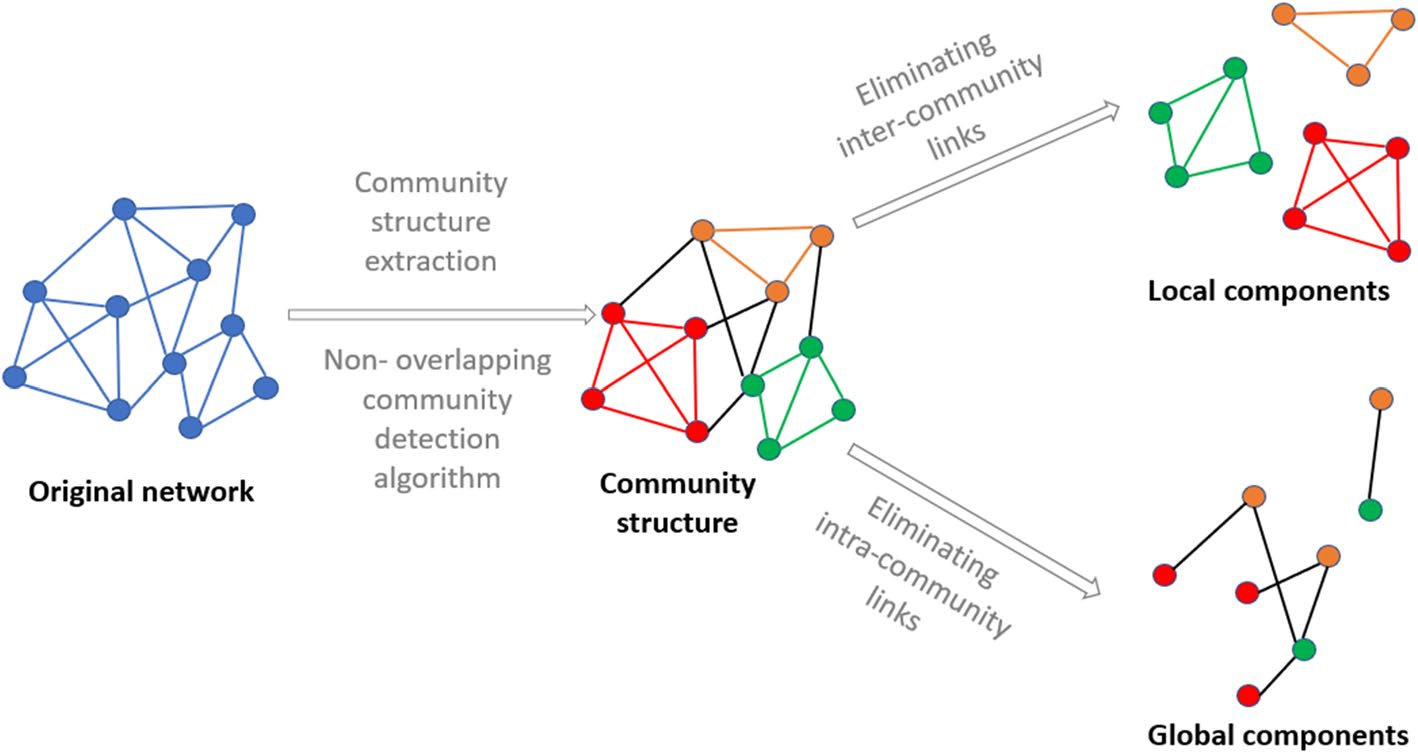

[2021]: Diop et al (Revealing the components structure of the world air transportation network)

In [353]:
class ComponentStructure:
    
    def __init__(self, graph, partition: dict):
        self.graph = nx.Graph.copy(graph)
        self.partition = partition
        self.communities_id = self.__get_communities()
        self.local_components = []
        self.global_components = []
        
    def set_local_components(self):
        for community_id in self.communities_id:
            nodes = set([k for k, v in self.partition.items() if v == community_id])
            part = {k: v for k, v in self.partition.items() if v == community_id}
            local_component = {"lc": self.graph.subgraph(nodes), "partition": part}
            self.local_components.append(local_component) 
        return partition
    
    """def set_global_components(self):
        temp_grap = self.remove_intra_community_edges()
        temp_grap = temp_grap["gp"]
        for community_id in self.communities_id:
            nodes = set([k for k, v in self.partition.items() if ((v == community_id) & temp_grap.has_node(k))])
            for node in nodes:
                neighbors = set(nx.neighbors(temp_grap, node))
                outer_nodes = neighbors.difference(nodes)
                inner_nodes = neighbors.intersection(nodes)
                if len(outer_nodes):
                    outer_nodes.add(node)
                    part = {k: v for k, v in self.partition.items() if k in outer_nodes}
                    global_component = {"gc": temp_grap.subgraph(outer_nodes), "partition": part}
                    self.global_components.append(global_component)
        return None
    """
    def remove_intra_community_edges(self):
        temp_graph = nx.Graph.copy(self.graph)
        for community_id in self.communities_id:
            nodes = set([k for k, v in self.partition.items() if v == community_id])
            for node in nodes:
                neighbors = set(nx.neighbors(temp_graph, node))
                inner_nodes = neighbors.intersection(nodes)
                for inner_node in inner_nodes:
                    temp_graph.remove_edge(node, inner_node)
        temp_graph.remove_nodes_from(list(nx.isolates(temp_graph)))
        part = {k: v for k, v in self.partition.items() if k in temp_graph.nodes()}
        return {'gp':temp_graph, 'part':part}
    
    def __get_communities(self) -> set:
        return set(self.partition.values())

In [527]:
A = ComponentStructure(kc_graph, partition)
A.set_local_components()
global_component = A.remove_intra_community_edges()

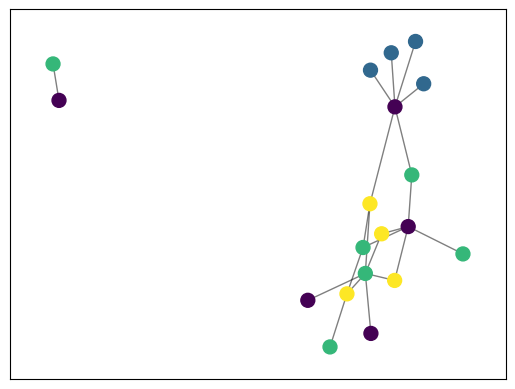

In [529]:
pos = nx.spring_layout(global_component['gp'])
cmap = plt.cm.get_cmap('viridis', max(global_component['part'].values()) + 1)
nx.draw_networkx_nodes(global_component["gp"], pos, global_component["part"].keys(), node_size=100, cmap=cmap, node_color=list(global_component["part"].values()))
nx.draw_networkx_edges(global_component["gp"], pos, alpha=0.5)
plt.show()

### Global components of the network

### Uncovering core-periphery insides global and local components of the network

In [530]:
gc = global_component['gp']

In [531]:
graphs = list(nx.connected_components(gc))

In [532]:
gc1 = gc.subgraph(graphs[0])

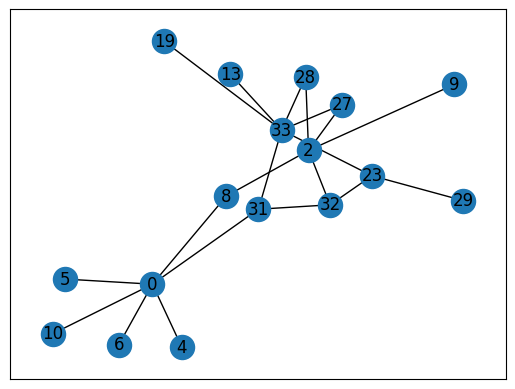

In [535]:
nx.draw_networkx(gc1)

### Main global component

{0: 0, 2: 0, 4: 0, 5: 0, 6: 0, 8: 0, 9: 0, 10: 0, 13: 0, 19: 0, 23: 0, 27: 0, 28: 0, 29: 0, 31: 0, 32: 0, 33: 1}


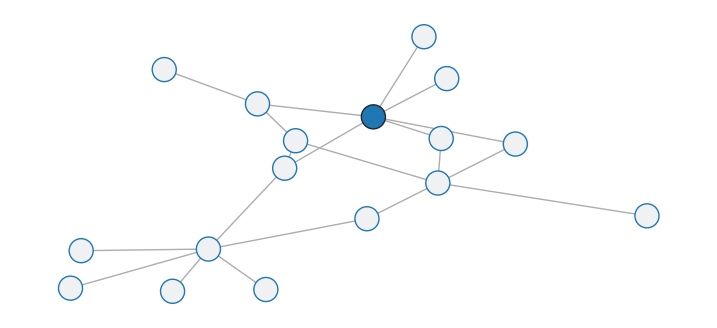

In [492]:
algo = cpnet.BE()
algo.detect(gc1)
x = algo.get_coreness()  # Get the coreness of nodes
c = algo.get_pair_id()
fig = plt.figure(figsize=(9, 4))
ax = plt.gca()
ax, pos = cpnet.draw(gc1, c, x, ax)
print(x)

In [525]:
alg = cpnet.MINRES()
alg.detect(gc1)
x = alg.get_coreness() 
c = alg.get_pair_id()
print(x)
for k, v in x.items():
    if v <= 0.64:
        x[k] = 0
    else:
        x[k] = 1
print(x)

{0: 0.6953615754270627, 2: 1.3986670471665934, 4: 0.2911481378627353, 5: 0.2852878412924845, 6: 0.26945882133924165, 8: 0.5049447538496308, 9: 0.4426709503283757, 10: 0.20425938336695418, 13: 0.2556668402242827, 19: 0.09181902005173048, 23: 0.86055355232865, 27: 0.8921883488132768, 28: 0.5959356601245762, 29: 0.3944531557741494, 31: 0.9303145572459124, 32: 0.844182399831592, 33: 0.6863091692891375}
{0: 1, 2: 1, 4: 0, 5: 0, 6: 0, 8: 0, 9: 0, 10: 0, 13: 0, 19: 0, 23: 1, 27: 1, 28: 0, 29: 0, 31: 1, 32: 1, 33: 1}


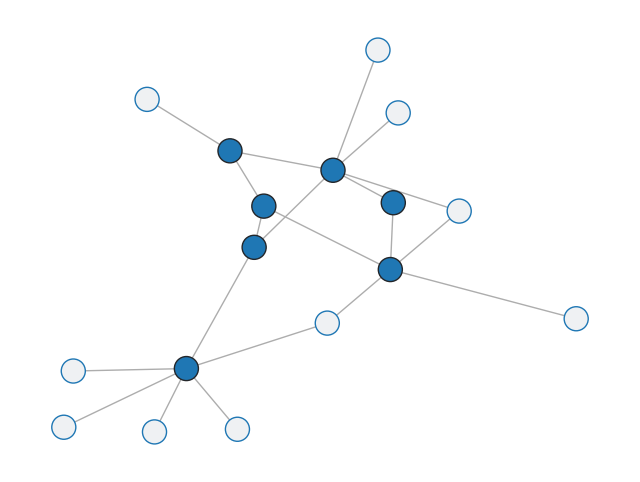

In [526]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(gc1, c, x, ax, pos = pos)

In [ ]:
#### Vendre la structure en composante de manière théorique
#### Faire des illustrations aussi
#### Rechercher des composantes locales et globales à partir de structures core-periphériques